In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from blackbody import plancks_law, plancks_law_wl, spectral_flux_density
from data import bran_z

In [2]:
temp = 20000

nu_range = np.logspace(11, 20, 100)
l_range = np.linspace(0.0, 3.0, 100)[1:] * 10.**-6.

In [3]:
print(plancks_law(10**15, 10000))
from astropy import constants as const
from astropy import units as u

1.2244794080759375e-07 J / (m2 sr)


In [29]:
print((const.c/(1 * u.nm)).to("Hz"))
print(plancks_law_wl(0.6*10**-6, 5000))
print(const.c*plancks_law(u.s*const.c/(0.6*10**-6*u.m), 5000).to("kW m^-2 sr^-1 Hz^-1"))

2.9979245799999994e+17 Hz
12.762388541757584 kW / (m2 nm sr)
0.0045944598750327316 kW / (Hz m s sr)


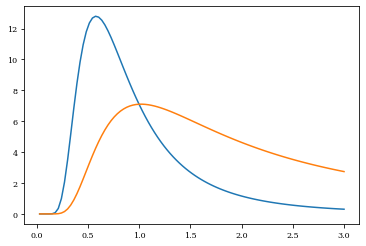

In [30]:
# for t in [10.**4.4, 10**4.6]:
plt.plot(l_range*10**6, plancks_law_wl(l_range, 5000))
plt.plot(l_range*10**6, const.c*plancks_law(u.s*const.c/(l_range*u.m), 5000))
# plt.xscale("log")
# plt.yscale("log")
# plt.ylim(bottom=10**-24)